In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, timedelta
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pmdarima import auto_arima

In [2]:
# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 21/02/2024 23:53:09


In [3]:
# define the ticker symbol for SPY
spy_tickerSymbol = 'SPY'

# define the ticker symbol for QQQ
qqq_tickerSymbol = 'QQQ'

# Set the end date for the data (current date)
end_date = datetime.now().strftime('%Y-%m-%d')

# Set the start date for the data (10 years ago from the current date)
start_date = (datetime.now() - timedelta(days=365*10)).strftime('%Y-%m-%d')

# get data on SPY ticker
spy_tickerData = yf.Ticker(spy_tickerSymbol)

# get the historical prices for SPY ticker
spy_tickerDf = spy_tickerData.history(period='1d', start=start_date, end=end_date)

# get data on QQQ ticker
qqq_tickerData = yf.Ticker(qqq_tickerSymbol)

# get the historical prices for QQQ ticker
qqq_tickerDf = qqq_tickerData.history(period='1d', start=start_date, end=end_date)

# see your data for SPY
print("SPY data:")
display(spy_tickerDf)

SPY data:


/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2014-02-24 00:00:00-05:00,153.804171,155.364910,153.737399,154.329987,114063900,0.0,0.0,0.0
2014-02-25 00:00:00-05:00,154.455209,154.897558,153.762471,154.271591,117085000,0.0,0.0,0.0
2014-02-26 00:00:00-05:00,154.496981,154.905950,153.845976,154.279984,98677200,0.0,0.0,0.0
2014-02-27 00:00:00-05:00,154.054602,155.131260,153.879326,155.089539,93880800,0.0,0.0,0.0
2014-02-28 00:00:00-05:00,155.064485,156.199572,154.446873,155.481796,150842000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-02-13 00:00:00-05:00,494.529999,497.089996,490.720001,494.079987,113099200,0.0,0.0,0.0
2024-02-14 00:00:00-05:00,496.790009,499.070007,494.399994,498.570007,68387800,0.0,0.0,0.0
2024-02-15 00:00:00-05:00,499.290009,502.200012,498.799988,502.010010,61683000,0.0,0.0,0.0


In [4]:
# see your data for QQQ
print("QQQ data:")
display(qqq_tickerDf)

QQQ data:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2014-02-24 00:00:00-05:00,82.648881,83.272369,82.557193,82.896446,31500400,0.000,0.0,0.0
2014-02-25 00:00:00-05:00,83.015637,83.180679,82.538848,82.804749,26771700,0.000,0.0,0.0
2014-02-26 00:00:00-05:00,83.024798,83.290691,82.401309,82.731392,42953700,0.000,0.0,0.0
2014-02-27 00:00:00-05:00,82.743374,83.351033,82.614477,83.268173,28742400,0.373,0.0,0.0
2014-02-28 00:00:00-05:00,83.249759,83.746939,82.439545,83.176102,48609800,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-02-13 00:00:00-05:00,427.279999,431.269989,425.329987,428.549988,64491700,0.000,0.0,0.0
2024-02-14 00:00:00-05:00,431.260010,433.649994,428.880005,433.220001,45092700,0.000,0.0,0.0
2024-02-15 00:00:00-05:00,433.920013,434.980011,431.329987,434.510010,38796100,0.000,0.0,0.0


In [5]:
# print the tail data for SPY
print("SPY tail data:")
display(spy_tickerDf.tail())

# print the tail data for QQQ
print("QQQ tail data:")
display(qqq_tickerDf.tail())

SPY tail data:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-02-13 00:00:00-05:00,494.529999,497.089996,490.720001,494.079987,113099200,0.0,0.0,0.0
2024-02-14 00:00:00-05:00,496.790009,499.070007,494.399994,498.570007,68387800,0.0,0.0,0.0
2024-02-15 00:00:00-05:00,499.290009,502.200012,498.799988,502.010010,61683000,0.0,0.0,0.0
2024-02-16 00:00:00-05:00,501.700012,502.869995,498.750000,499.510010,75461200,0.0,0.0,0.0
2024-02-20 00:00:00-05:00,497.720001,498.410004,494.450012,496.760010,71736700,0.0,0.0,0.0


QQQ tail data:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-02-13 00:00:00-05:00,427.279999,431.269989,425.329987,428.549988,64491700,0.0,0.0,0.0
2024-02-14 00:00:00-05:00,431.260010,433.649994,428.880005,433.220001,45092700,0.0,0.0,0.0
2024-02-15 00:00:00-05:00,433.920013,434.980011,431.329987,434.510010,38796100,0.0,0.0,0.0
2024-02-16 00:00:00-05:00,434.890015,434.989990,429.850006,430.570007,53661500,0.0,0.0,0.0
2024-02-20 00:00:00-05:00,428.549988,430.079987,423.500000,427.320007,53999500,0.0,0.0,0.0


In [6]:
# Display the shape of the data for both SPY and QQQ
print("SPY shape:")
display(spy_tickerDf.shape)

print("QQQ shape:")
display(qqq_tickerDf.shape)

# Display the data types for both SPY and QQQ
print("SPY data types:")
display(spy_tickerDf.dtypes)

print("QQQ data types:")
display(qqq_tickerDf.dtypes)

# Display the columns for both SPY and QQQ
print("SPY columns:")
display(spy_tickerDf.columns)

# Display the null values for both SPY and QQQ
print("SPY null values:")
display(spy_tickerDf.isnull().sum())

print("QQQ null values:")
display(qqq_tickerDf.isnull().sum())

# Display the summary statistics for both SPY and QQQ
print("SPY summary statistics:")
display(spy_tickerDf.describe())

print("QQQ summary statistics:")
display(qqq_tickerDf.describe())

# Display the information for both SPY and QQQ
print("SPY info:")
display(spy_tickerDf.info())

print("QQQ info:")
display(qqq_tickerDf.info())

# Display the number of unique values for both SPY and QQQ
print("SPY unique values:")
display(spy_tickerDf.nunique())

print("QQQ unique values:")
display(qqq_tickerDf.nunique())

# Display the correlation between the closing prices of SPY and QQQ
print("Correlation between SPY and QQQ closing prices:")
display(spy_tickerDf['Close'].corr(qqq_tickerDf['Close']))

SPY shape:


(2515, 8)

QQQ shape:


(2515, 8)

SPY data types:


Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Dividends        float64
Stock Splits     float64
Capital Gains    float64
dtype: object

QQQ data types:


Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Dividends        float64
Stock Splits     float64
Capital Gains    float64
dtype: object

SPY columns:


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Capital Gains'],
      dtype='object')

SPY null values:


Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64

QQQ null values:


Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64

SPY summary statistics:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.000000,2515.0,2515.0
mean,284.255326,285.832518,282.562207,284.312226,9.204639e+07,0.020860,0.0,0.0
std,98.812926,99.461817,98.148676,98.857655,4.587363e+07,0.167056,0.0,0.0
min,152.689056,153.720207,151.993261,152.160919,2.027000e+07,0.000000,0.0,0.0
25%,189.091511,189.790935,188.141533,188.964951,6.278120e+07,0.000000,0.0,0.0
50%,259.001856,260.295180,257.513315,259.041870,8.001180e+07,0.000000,0.0,0.0
75%,383.922479,387.310532,381.038309,384.596176,1.065276e+08,0.000000,0.0,0.0
max,501.700012,503.500000,500.239990,502.010010,5.072443e+08,1.906000,0.0,0.0


QQQ summary statistics:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.000000,2515.0,2515.0
mean,206.032620,207.566344,204.388922,206.096497,4.149848e+07,0.006288,0.0,0.0
std,101.269262,102.138961,100.356520,101.316137,2.227186e+07,0.051263,0.0,0.0
min,77.829444,78.641517,76.851294,77.617203,7.079300e+06,0.000000,0.0,0.0
25%,109.692899,110.337585,109.176238,109.896397,2.540355e+07,0.000000,0.0,0.0
50%,173.843890,175.321816,172.869284,173.670517,3.620400e+07,0.000000,0.0,0.0
75%,300.475842,303.703913,297.239663,300.931244,5.206000e+07,0.000000,0.0,0.0
max,436.940002,439.140015,434.649994,437.049988,1.986858e+08,0.808000,0.0,0.0


SPY info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2014-02-24 00:00:00-05:00 to 2024-02-20 00:00:00-05:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           2515 non-null   float64
 1   High           2515 non-null   float64
 2   Low            2515 non-null   float64
 3   Close          2515 non-null   float64
 4   Volume         2515 non-null   int64  
 5   Dividends      2515 non-null   float64
 6   Stock Splits   2515 non-null   float64
 7   Capital Gains  2515 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 176.8 KB


None

QQQ info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2014-02-24 00:00:00-05:00 to 2024-02-20 00:00:00-05:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           2515 non-null   float64
 1   High           2515 non-null   float64
 2   Low            2515 non-null   float64
 3   Close          2515 non-null   float64
 4   Volume         2515 non-null   int64  
 5   Dividends      2515 non-null   float64
 6   Stock Splits   2515 non-null   float64
 7   Capital Gains  2515 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 176.8 KB


None

SPY unique values:


Open             2514
High             2512
Low              2515
Close            2470
Volume           2513
Dividends          39
Stock Splits        1
Capital Gains       1
dtype: int64

QQQ unique values:


Open             2514
High             2515
Low              2514
Close            2472
Volume           2513
Dividends          41
Stock Splits        1
Capital Gains       1
dtype: int64

Correlation between SPY and QQQ closing prices:


0.9919020795839002

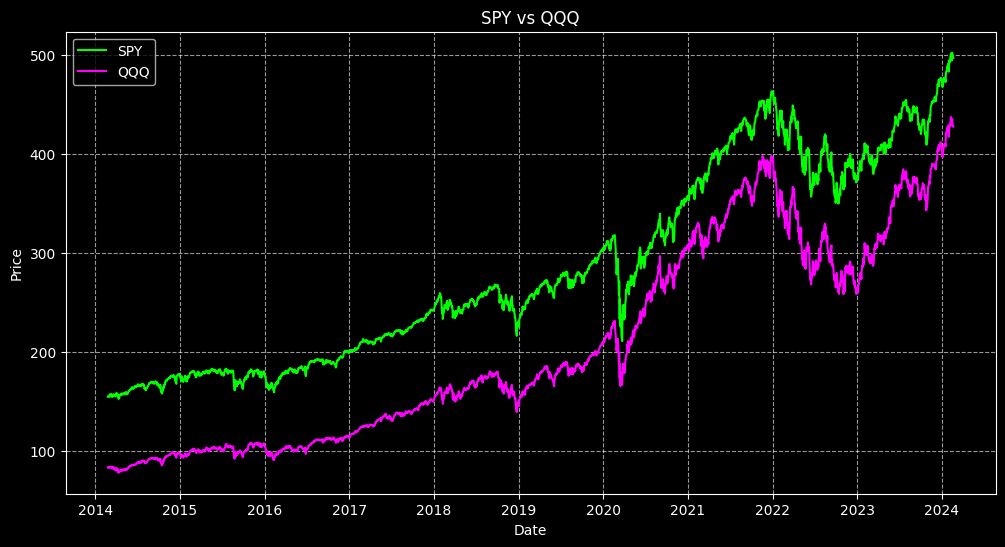

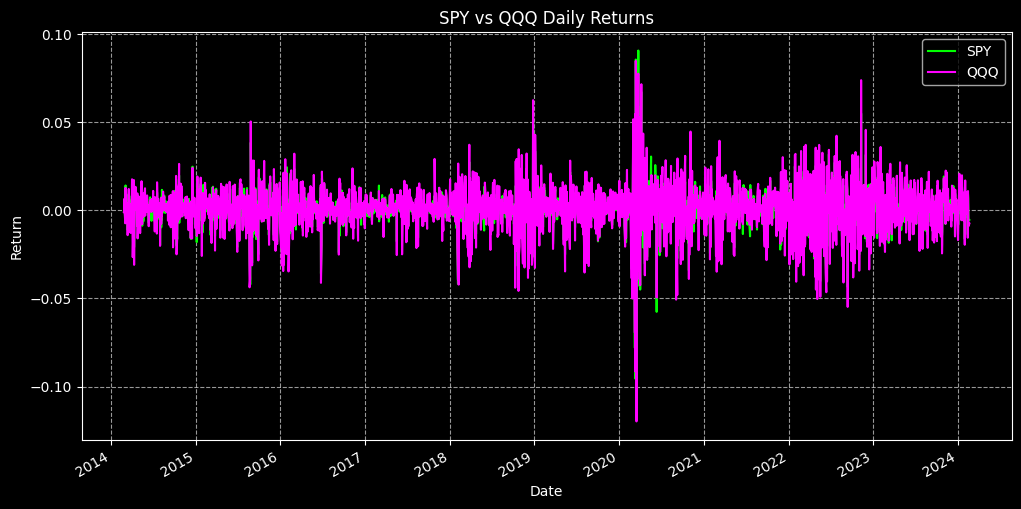

In [7]:
# Set the style to 'dark_background'
plt.style.use('dark_background')

# Plot the closing prices of SPY and QQQ
plt.figure(figsize=(12, 6))
plt.plot(spy_tickerDf['Close'], label='SPY', color='lime')
plt.plot(qqq_tickerDf['Close'], label='QQQ', color='magenta')
plt.title('SPY vs QQQ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

# Plot the daily returns of SPY and QQQ
plt.figure(figsize=(12, 6))
spy_tickerDf['Close'].pct_change().plot(label='SPY', color='lime')
qqq_tickerDf['Close'].pct_change().plot(label='QQQ', color='magenta')
plt.title('SPY vs QQQ Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(loc='upper right')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

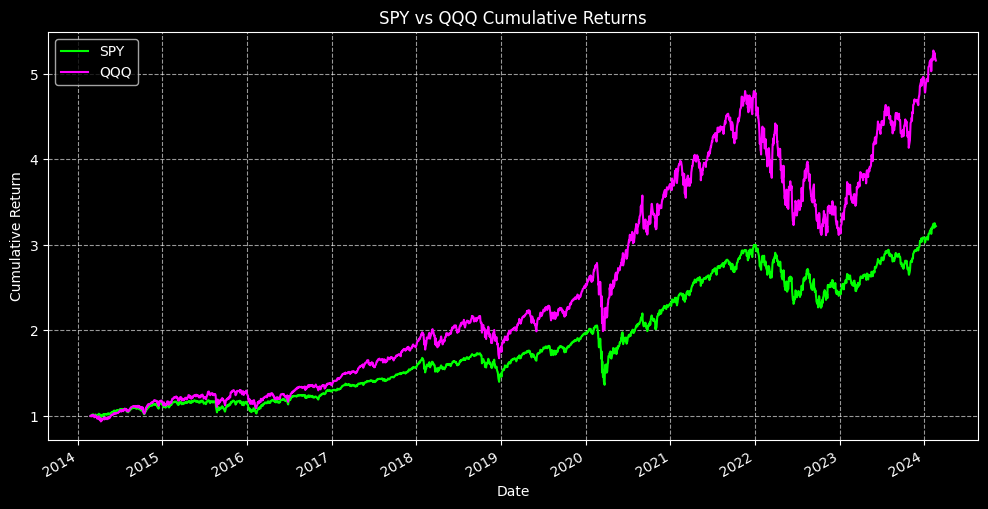

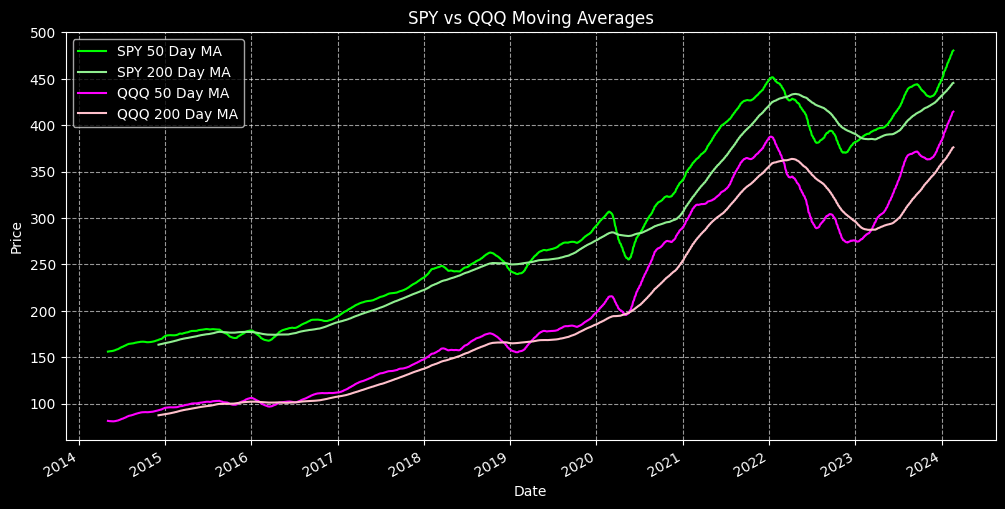

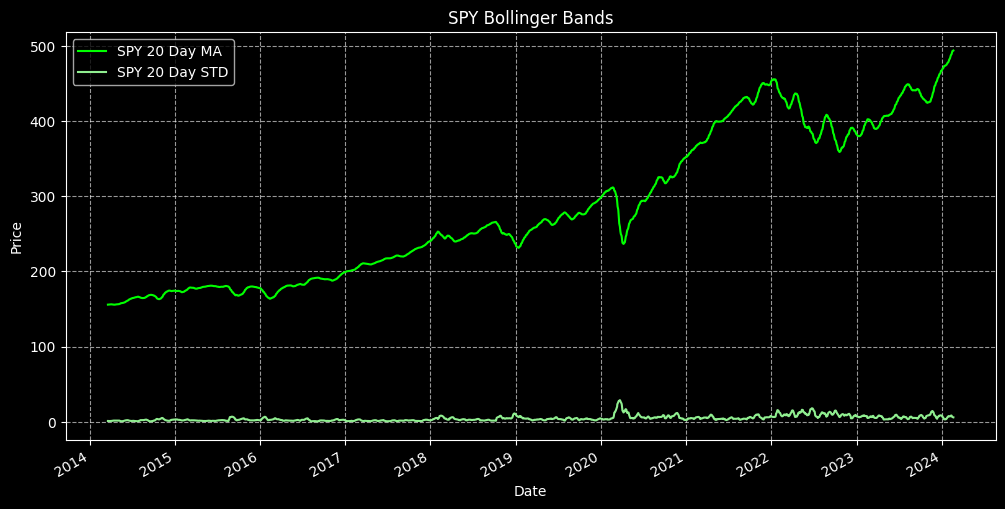

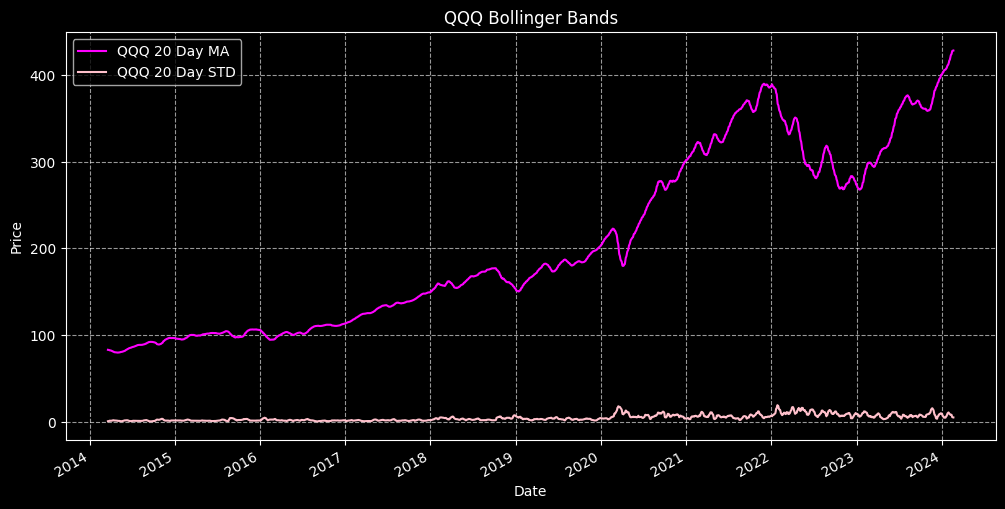

In [8]:
# Plot the cumulative returns of SPY and QQQ
plt.figure(figsize=(12, 6))
(spy_tickerDf['Close'].pct_change() + 1).cumprod().plot(label='SPY', color='lime')
(qqq_tickerDf['Close'].pct_change() + 1).cumprod().plot(label='QQQ', color='magenta')
plt.title('SPY vs QQQ Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

# Plot the moving averages of SPY and QQQ
plt.figure(figsize=(12, 6))
spy_tickerDf['Close'].rolling(window=50).mean().plot(label='SPY 50 Day MA', color='lime')
spy_tickerDf['Close'].rolling(window=200).mean().plot(label='SPY 200 Day MA', color='lightgreen')
qqq_tickerDf['Close'].rolling(window=50).mean().plot(label='QQQ 50 Day MA', color='magenta')
qqq_tickerDf['Close'].rolling(window=200).mean().plot(label='QQQ 200 Day MA', color='pink')
plt.title('SPY vs QQQ Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

# Plot the Bollinger Bands of SPY
plt.figure(figsize=(12, 6))
spy_tickerDf['Close'].rolling(window=20).mean().plot(label='SPY 20 Day MA', color='lime')
spy_tickerDf['Close'].rolling(window=20).std().plot(label='SPY 20 Day STD', color='lightgreen')
plt.title('SPY Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

# Plot the Bollinger Bands of QQQ
plt.figure(figsize=(12, 6))
qqq_tickerDf['Close'].rolling(window=20).mean().plot(label='QQQ 20 Day MA', color='magenta')
qqq_tickerDf['Close'].rolling(window=20).std().plot(label='QQQ 20 Day STD', color='pink')
plt.title('QQQ Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

The Bollinger Bands are a technical analysis tool developed by John Bollinger in the 1980s. They consist of three lines plotted on a price chart: a middle band, typically a simple moving average (SMA), and an upper and lower band, which are usually two standard deviations away from the middle band.

The purpose of Bollinger Bands is to provide a relative definition of high and low prices. The width of the bands adjusts dynamically based on the volatility of the market; when the market is more volatile, the bands widen, and when it's less volatile, the bands contract.

Traders often use Bollinger Bands to identify potential overbought or oversold conditions in the market. When prices move close to the upper band, it may indicate that the stock is overbought, and when prices move close to the lower band, it may indicate that the stock is oversold. Additionally, traders look for instances where the price moves outside of the bands, which could signal a potential reversal or continuation of a trend.

Overall, Bollinger Bands are a popular tool among technical analysts for assessing price volatility, identifying potential entry and exit points, and confirming trend reversals.

20-day Moving Average (MA):

The 20-day moving average is a line plotted on the chart that represents the average closing price of SPY over the past 20 trading days.

It smooths out price fluctuations and helps identify the overall direction of the trend.
When the price of SPY is above the 20-day MA, it suggests that the short-term trend is bullish or upward.
Conversely, when the price is below the 20-day MA, it indicates a bearish or downward trend in the short term.

20-day Standard Deviation (STD):

The 20-day standard deviation is a measure of the volatility or dispersion of SPY prices around the 20-day moving average.

It quantifies how much the price of SPY deviates from its average over the past 20 trading days.
A higher standard deviation indicates higher volatility, while a lower standard deviation suggests lower volatility.
Traders often use standard deviation to gauge the magnitude of price swings and assess the risk associated with trading SPY.

Now, let's interpret the chart:

Trend Identification:

If the price of SPY consistently stays above the 20-day MA and the 20-day MA slopes upward, it suggests a strong bullish trend.

Conversely, if the price consistently stays below the 20-day MA and the MA slopes downward, it indicates a strong bearish trend.

Volatility Assessment:
Wide fluctuations between the upper and lower bands of the Bollinger Bands (which are typically set at the 20-day MA plus and minus the 20-day STD) indicate higher volatility.
Narrow fluctuations suggest lower volatility.

Interpretation:

Bullish Signals:
Price consistently above the 20-day MA.
The 20-day MA slopes upward.
Volatility is moderate to low.

Bearish Signals:
Price consistently below the 20-day MA.
The 20-day MA slopes downward.
Volatility is moderate to high.

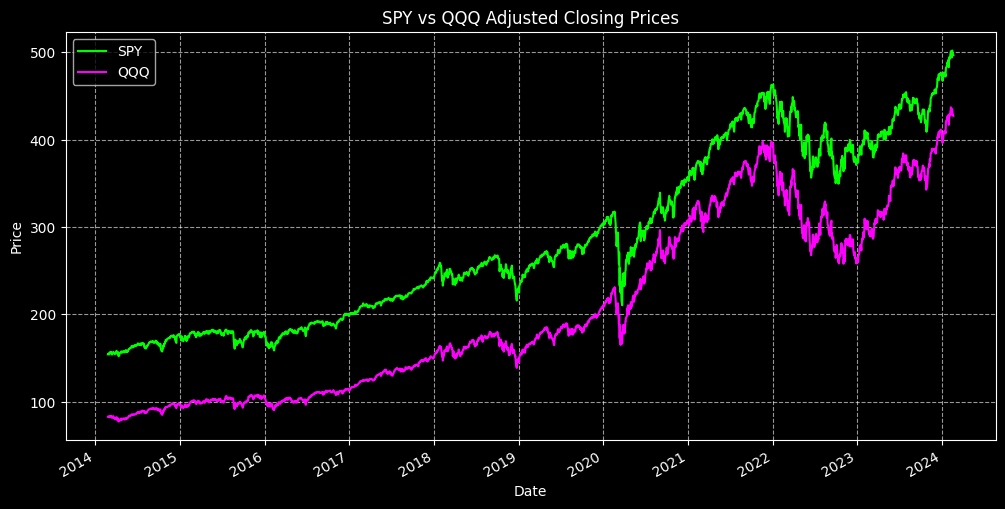

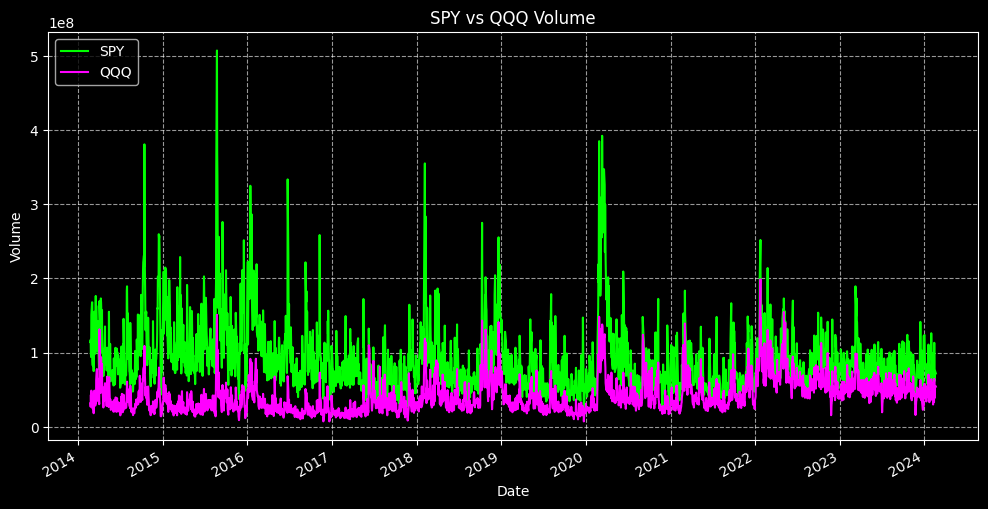

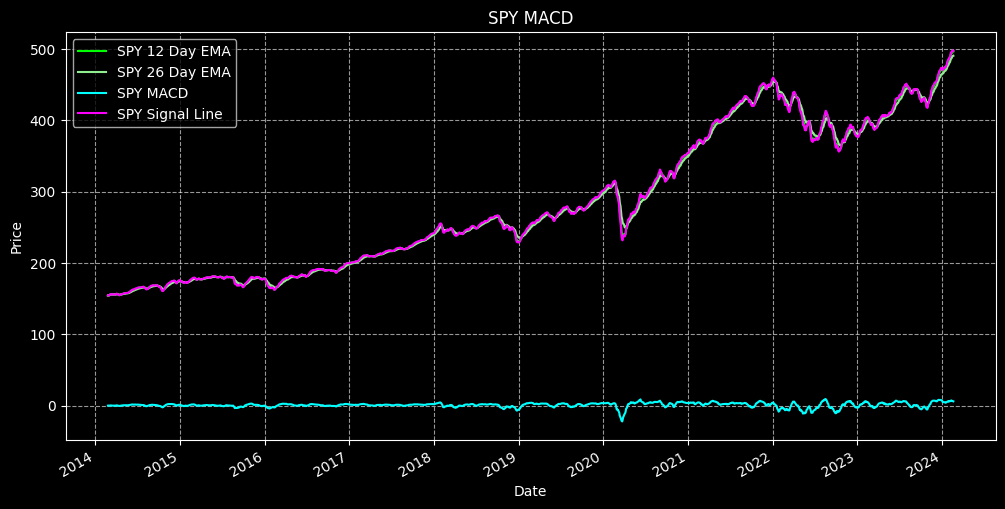

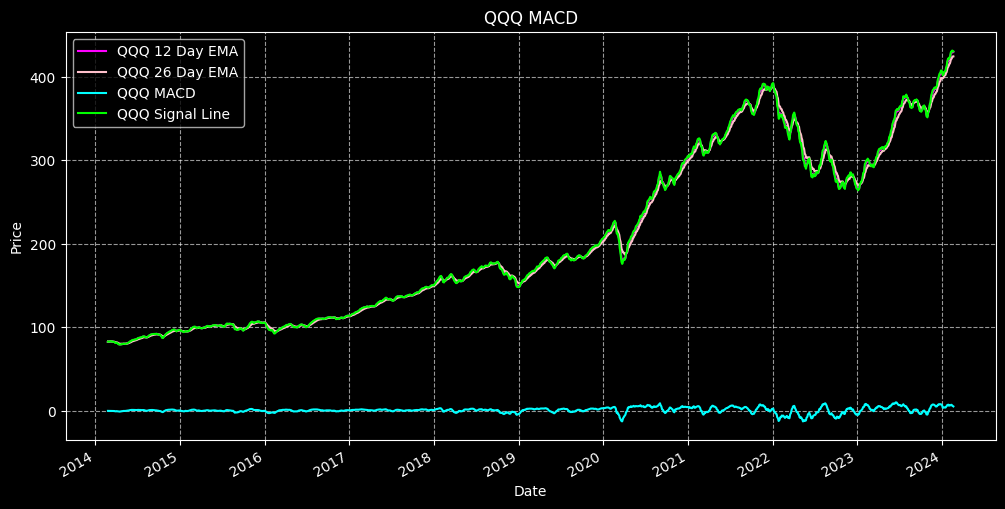

In [9]:
# Plot the adjusted closing prices of SPY and QQQ
plt.figure(figsize=(12, 6))
spy_tickerDf['Close'].plot(label='SPY', color='lime')
qqq_tickerDf['Close'].plot(label='QQQ', color='magenta')
plt.title('SPY vs QQQ Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

# Plot the volume of SPY and QQQ
plt.figure(figsize=(12, 6))
spy_tickerDf['Volume'].plot(label='SPY', color='lime')
qqq_tickerDf['Volume'].plot(label='QQQ', color='magenta')
plt.title('SPY vs QQQ Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

# Plot the moving average convergence divergence of SPY
plt.figure(figsize=(12, 6))
spy_tickerDf['Close'].ewm(span=12).mean().plot(label='SPY 12 Day EMA', color='lime')
spy_tickerDf['Close'].ewm(span=26).mean().plot(label='SPY 26 Day EMA', color='lightgreen')
spy_tickerDf['Close'].ewm(span=12).mean().sub(spy_tickerDf['Close'].ewm(span=26).mean()).plot(label='SPY MACD', color='cyan')
spy_tickerDf['Close'].ewm(span=9).mean().plot(label='SPY Signal Line', color='magenta')
plt.title('SPY MACD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

# Plot the moving average convergence divergence of QQQ
plt.figure(figsize=(12, 6))
qqq_tickerDf['Close'].ewm(span=12).mean().plot(label='QQQ 12 Day EMA', color='magenta')
qqq_tickerDf['Close'].ewm(span=26).mean().plot(label='QQQ 26 Day EMA', color='pink')
qqq_tickerDf['Close'].ewm(span=12).mean().sub(qqq_tickerDf['Close'].ewm(span=26).mean()).plot(label='QQQ MACD', color='cyan')
qqq_tickerDf['Close'].ewm(span=9).mean().plot(label='QQQ Signal Line', color='lime')
plt.title('QQQ MACD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

The Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

In [10]:
# Calculate the correlation matrix for SPY
spy_corr = spy_tickerDf.corr()
print("SPY Correlation Matrix:")
display(spy_corr)

# Calculate the correlation matrix for QQQ
qqq_corr = qqq_tickerDf.corr()
print("QQQ Correlation Matrix:")
display(qqq_corr)

SPY Correlation Matrix:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Open,1.000000,0.999852,0.999810,0.999668,-0.240280,0.016029,NaN,NaN
High,0.999852,1.000000,0.999691,0.999793,-0.233408,0.015394,NaN,NaN
Low,0.999810,0.999691,1.000000,0.999819,-0.250067,0.015022,NaN,NaN
Close,0.999668,0.999793,0.999819,1.000000,-0.243171,0.014268,NaN,NaN
Volume,-0.240280,-0.233408,-0.250067,-0.243171,1.000000,0.124239,NaN,NaN
Dividends,0.016029,0.015394,0.015022,0.014268,0.124239,1.000000,NaN,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capital Gains,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


QQQ Correlation Matrix:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Open,1.000000,0.999874,0.999831,0.999668,0.351155,0.023155,NaN,NaN
High,0.999874,1.000000,0.999774,0.999819,0.357016,0.023038,NaN,NaN
Low,0.999831,0.999774,1.000000,0.999847,0.341702,0.023589,NaN,NaN
Close,0.999668,0.999819,0.999847,1.000000,0.347886,0.023601,NaN,NaN
Volume,0.351155,0.357016,0.341702,0.347886,1.000000,0.014258,NaN,NaN
Dividends,0.023155,0.023038,0.023589,0.023601,0.014258,1.000000,NaN,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capital Gains,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


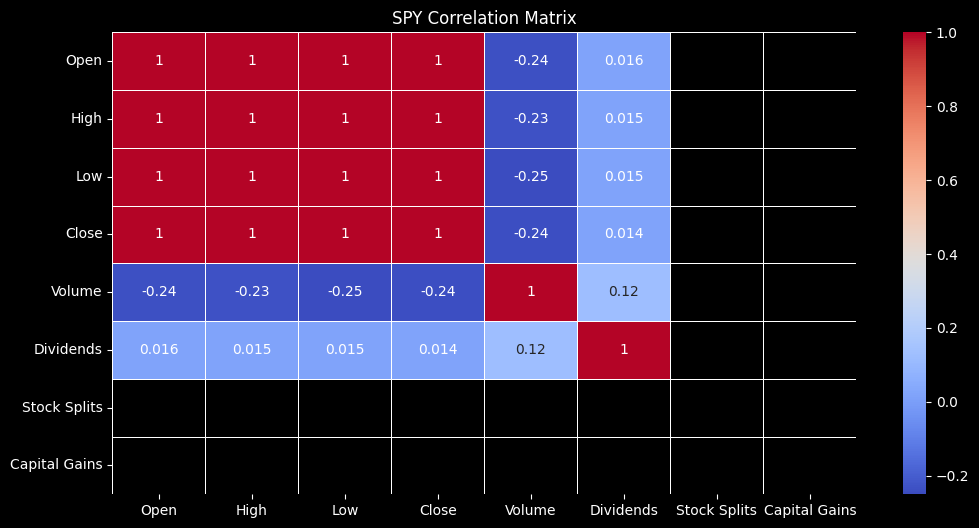

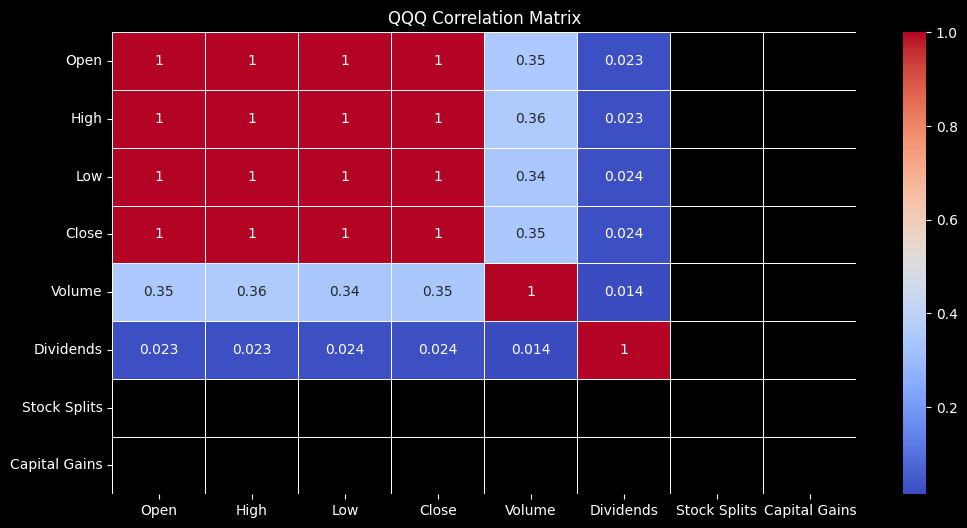

In [11]:
# Plot the correlation matrix for SPY
plt.figure(figsize=(12, 6))
sns.heatmap(spy_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('SPY Correlation Matrix')
plt.show()

# Plot the correlation matrix for QQQ
plt.figure(figsize=(12, 6))
sns.heatmap(qqq_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('QQQ Correlation Matrix')
plt.show()

Here's a brief interpretation of the correlation matrix:

The Open, High, Low, and Close prices are highly positively correlated with each other. This is expected as these values are usually closely related in stock data.

Volume is negatively correlated with the Open, High, Low, and Close prices, but the correlation is not very strong. This suggests that there isn't a strong linear relationship between the volume and these prices.

Dividends have a very weak positive correlation with the Open, High, Low, and Close prices, and a slightly stronger positive correlation with Volume. This suggests that there might be a slight linear relationship between dividends and these variables.

The Stock Splits and Capital Gains columns have NaN values for their correlations with all other columns. This could be due to these columns having no variation (i.e., all values are the same) or containing only missing values. 
Correlation cannot be calculated in these cases.

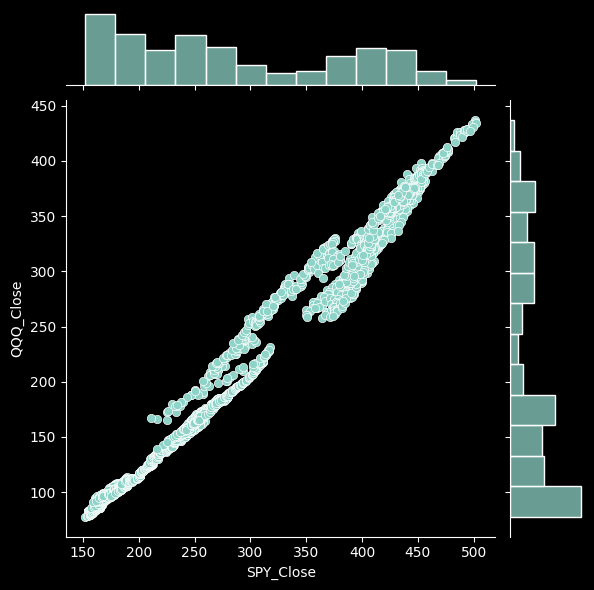

In [12]:
# Create a new DataFrame that contains the 'Close' prices of both SPY and QQQ
data = pd.DataFrame()
data['SPY_Close'] = spy_tickerDf['Close']
data['QQQ_Close'] = qqq_tickerDf['Close']

# Drop any rows with missing values
data.dropna(inplace=True)

# Create a jointplot of the 'Close' prices of SPY and QQQ
sns.jointplot(x='SPY_Close', y='QQQ_Close', data=data, kind='scatter')
plt.show()

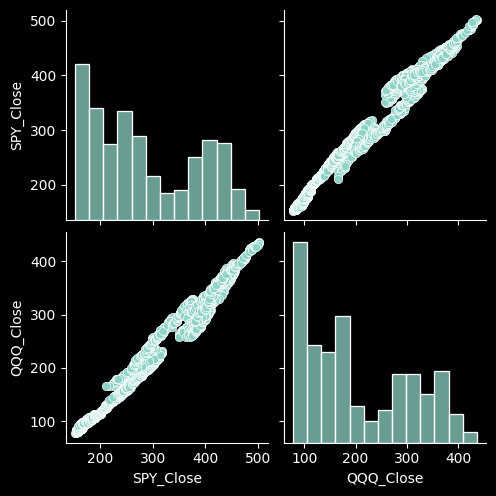

In [13]:
# Create a pairplot of the 'Close' prices of SPY and QQQ
sns.pairplot(data)
plt.show()

In [14]:
# Calculate the expected return for SPY
spy_daily_returns = spy_tickerDf['Close'].pct_change()

# Calculate the expected return for QQQ
qqq_daily_returns = qqq_tickerDf['Close'].pct_change()

# Calculate the mean of the daily returns for SPY
spy_mean_daily_return = spy_daily_returns.mean()

# Calculate the mean of the daily returns for QQQ
qqq_mean_daily_return = qqq_daily_returns.mean()

# Print the mean of the daily returns for SPY
print("SPY Mean Daily Return:")
display(spy_mean_daily_return)

# Print the mean of the daily returns for QQQ
print("QQQ Mean Daily Return:")
display(qqq_mean_daily_return)

# Calculate the standard deviation of the daily returns for SPY
spy_std_daily_return = spy_daily_returns.std()

# Calculate the standard deviation of the daily returns for QQQ
qqq_std_daily_return = qqq_daily_returns.std()

# Print the standard deviation of the daily returns for SPY
print("SPY Standard Deviation of Daily Return:")
display(spy_std_daily_return)

# Print the standard deviation of the daily returns for QQQ
print("QQQ Standard Deviation of Daily Return:")
display(qqq_std_daily_return)

SPY Mean Daily Return:


0.000526194279129561

QQQ Mean Daily Return:


0.0007446779709736701

SPY Standard Deviation of Daily Return:


0.011030518009348001

QQQ Standard Deviation of Daily Return:


0.013553681711919199

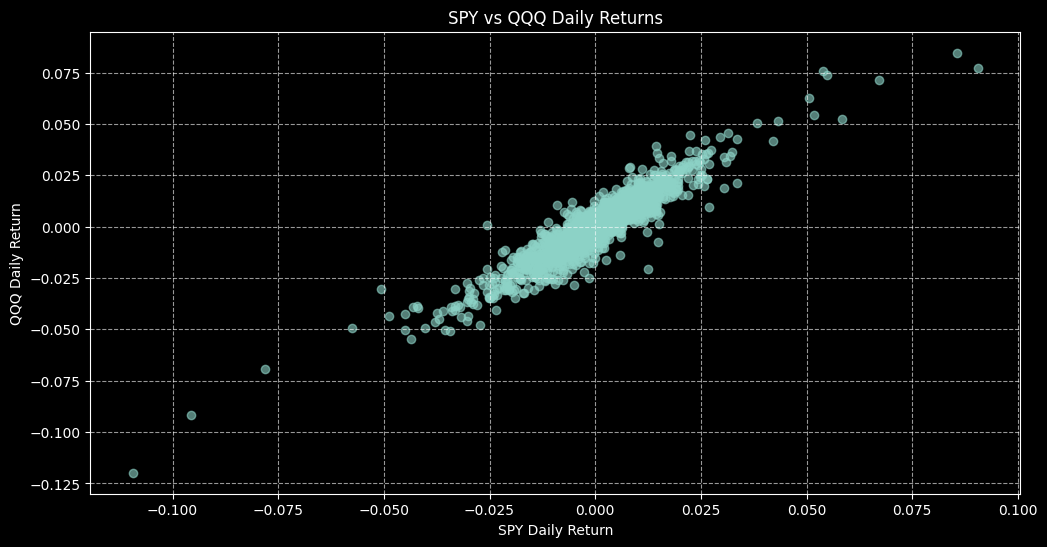

In [15]:
# Create a scatter plot of the daily returns for SPY and QQQ
plt.figure(figsize=(12, 6))
plt.scatter(spy_daily_returns, qqq_daily_returns, alpha=0.6)
plt.title('SPY vs QQQ Daily Returns')
plt.xlabel('SPY Daily Return')
plt.ylabel('QQQ Daily Return')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

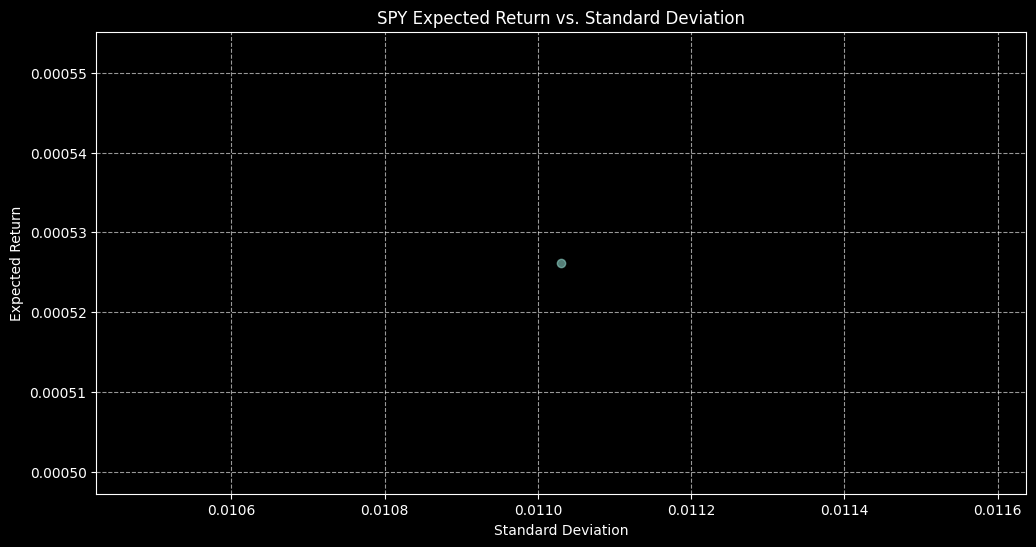

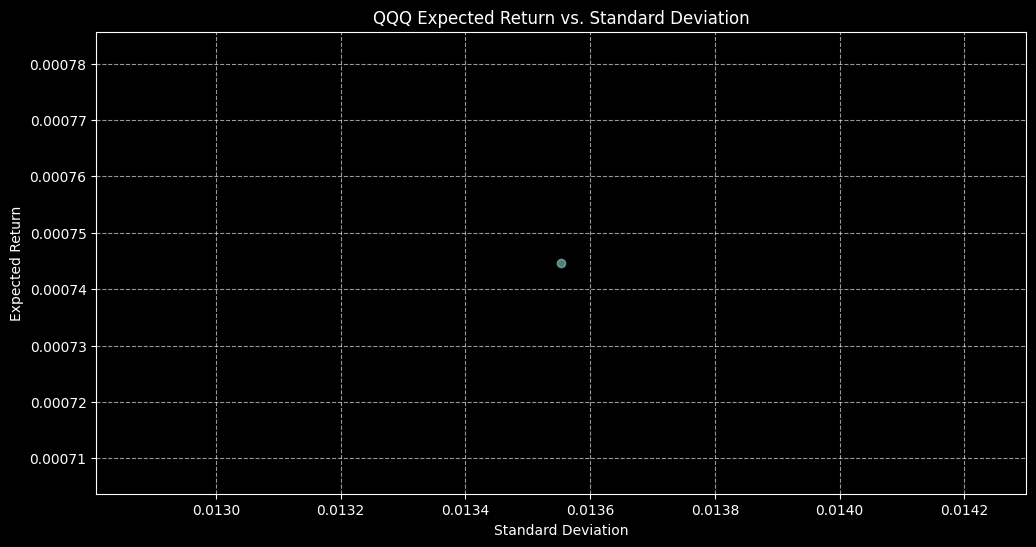

In [16]:
# Expected return vs. Standard deviation
plt.figure(figsize=(12, 6))
plt.scatter(spy_std_daily_return, spy_mean_daily_return, alpha=0.6)
plt.title('SPY Expected Return vs. Standard Deviation')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

# Expected return vs. Standard deviation
plt.figure(figsize=(12, 6))
plt.scatter(qqq_std_daily_return, qqq_mean_daily_return, alpha=0.6)
plt.title('QQQ Expected Return vs. Standard Deviation')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

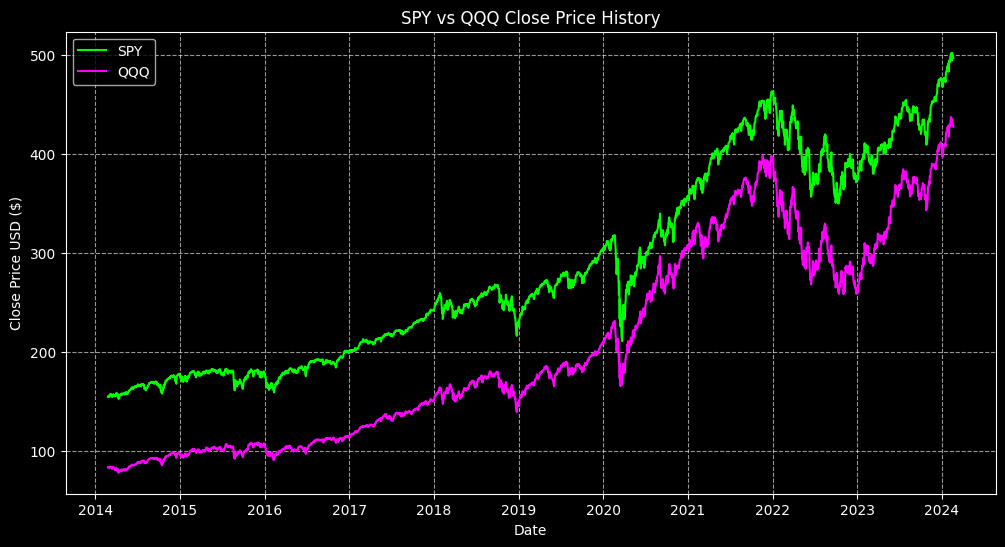

In [17]:
# Plot close price history for SPY and QQQ
plt.figure(figsize=(12, 6))
plt.plot(spy_tickerDf['Close'], label='SPY', color='lime')
plt.plot(qqq_tickerDf['Close'], label='QQQ', color='magenta')
plt.title('SPY vs QQQ Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

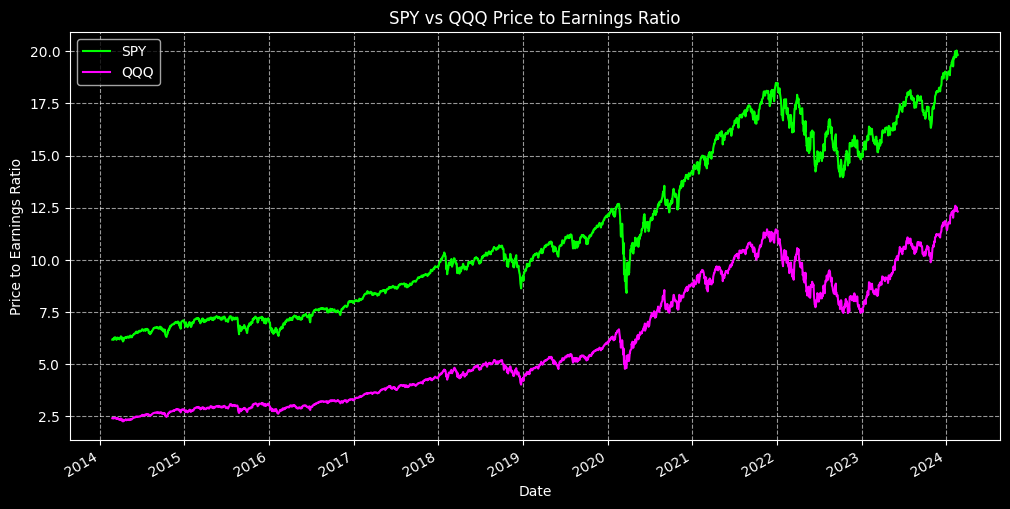

In [18]:
# calculate price to earnings ratio for SPY and QQQ
spy_pe_ratio = spy_tickerDf['Close'] / spy_tickerData.info['trailingPE']
qqq_pe_ratio = qqq_tickerDf['Close'] / qqq_tickerData.info['trailingPE']

# plot the price to earnings ratio for SPY and QQQ
plt.figure(figsize=(12, 6))
spy_pe_ratio.plot(label='SPY', color='lime')
qqq_pe_ratio.plot(label='QQQ', color='magenta')
plt.title('SPY vs QQQ Price to Earnings Ratio')
plt.xlabel('Date')
plt.ylabel('Price to Earnings Ratio')
plt.legend(loc='upper left')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

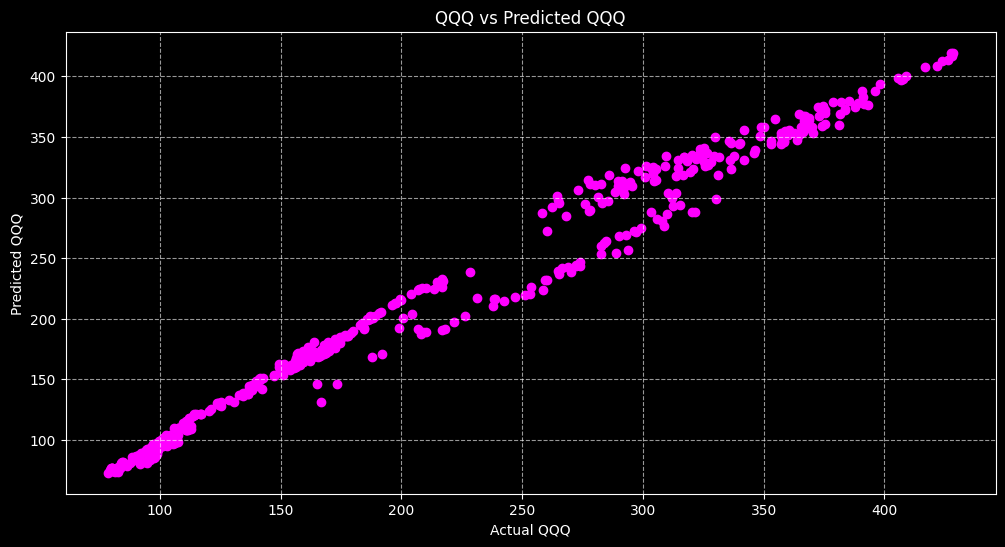

Intercept:


-83.24209589211853

Coefficients:


array([1.01742156])

Mean Absolute Error:


10.1634439302362

Mean Squared Error:


173.75486795324616

Root Mean Squared Error:


13.18161097716232

R-Squared:


0.9833010750004751

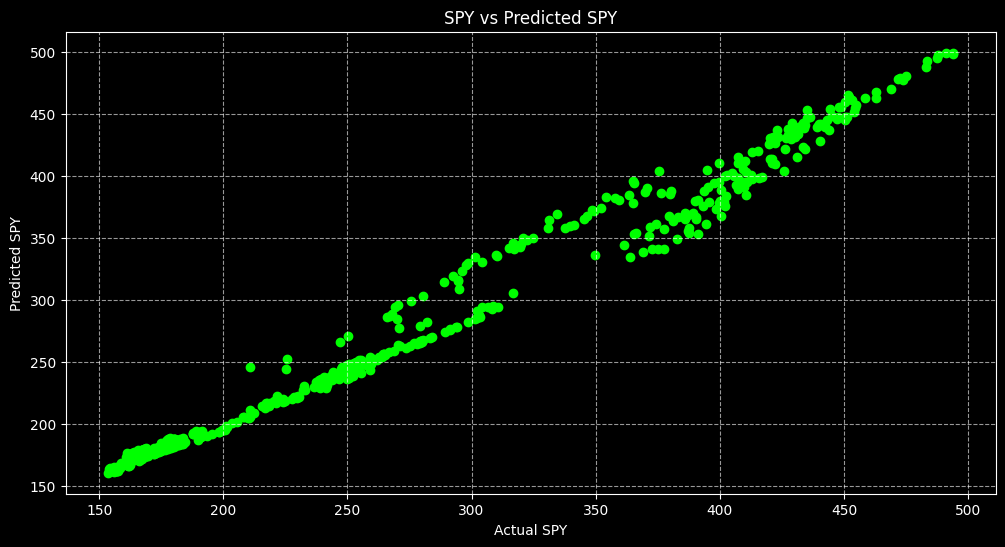

Intercept:


85.0482321623725

Coefficients:


array([0.96716173])

Mean Absolute Error:


9.992466321363503

Mean Squared Error:


166.36220977995234

Root Mean Squared Error:


12.89814753288054

R-Squared:


0.9833087760425121

In [19]:
# Train a linear regression model to predict the price of SPY and QQQ
X = data[['SPY_Close']]
y = data['QQQ_Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

# Plot the linear regression model
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='magenta')
plt.title('QQQ vs Predicted QQQ')
plt.xlabel('Actual QQQ')
plt.ylabel('Predicted QQQ')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

# Print the intercept of the linear regression model
print("Intercept:")
display(lm.intercept_)
# Print the coefficients of the linear regression model
print("Coefficients:")
display(lm.coef_)
# Print the mean absolute error of the linear regression model
print("Mean Absolute Error:")
display(metrics.mean_absolute_error(y_test, y_pred))
# Print the mean squared error of the linear regression model
print("Mean Squared Error:")
display(metrics.mean_squared_error(y_test, y_pred))
# Print the root mean squared error of the linear regression model
print("Root Mean Squared Error:")
display(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Print the R-squared value of the linear regression model
print("R-Squared:")
display(metrics.r2_score(y_test, y_pred))

# Train a linear regression model to predict the price of SPY
X = data[['QQQ_Close']]
y = data['SPY_Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

# Plot the linear regression model
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='lime')
plt.title('SPY vs Predicted SPY')
plt.xlabel('Actual SPY')
plt.ylabel('Predicted SPY')
plt.grid(True, color='white', alpha=0.6, linestyle='--')
plt.show()

# Print the intercept of the linear regression model
print("Intercept:")
display(lm.intercept_)
# Print the coefficients of the linear regression model
print("Coefficients:")
display(lm.coef_)
# Print the mean absolute error of the linear regression model
print("Mean Absolute Error:")
display(metrics.mean_absolute_error(y_test, y_pred))
# Print the mean squared error of the linear regression model
print("Mean Squared Error:")
display(metrics.mean_squared_error(y_test, y_pred))
# Print the root mean squared error of the linear regression model
print("Root Mean Squared Error:")
display(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Print the R-squared value of the linear regression model
print("R-Squared:")
display(metrics.r2_score(y_test, y_pred))

In [20]:
# Predicting SPY price
spy_close = data['SPY_Close']

# Fit auto_arima function to SPY_Close
stepwise_fit = auto_arima(spy_close, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

# Predict the next 10 prices
n_periods = 10
fitted, confint = stepwise_fit.predict(n_periods=n_periods, return_conf_int=True)
print(fitted)

# Repeat the same steps for QQQ_Close
qqq_close = data['QQQ_Close']
stepwise_fit = auto_arima(qqq_close, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

stepwise_fit.summary()
fitted, confint = stepwise_fit.predict(n_periods=n_periods, return_conf_int=True)
print(fitted)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=10.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=19003.817, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=14104.141, Time=2.77 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=16868.495, Time=3.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=19059.141, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=14740.832, Time=0.33 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=13765.788, Time=8.39 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=18.33 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=11.26 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=18969.730, Time=6.18 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=13761.855, Time=8.77 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=14103.591, Time=4.37 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=25.67 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=10.49 sec


: 